# **Sentiment Analysis of Tweets**

## **Import libraries**

In [1]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

## **Load Tweets**

In [2]:
data = pd.read_csv("tweets.csv", low_memory = False)

In [3]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1406400408545804288,1406400396264943616,2021-06-20 05:26:01 IST,2021-06-20,05:26:01,530,1113747629282930688,ballouxfrancois,Prof Francois Balloux,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1406390341176016897,1406390341176016897,2021-06-20 04:46:01 IST,2021-06-20,04:46:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1406386311481774083,1406386311481774083,2021-06-20 04:30:00 IST,2021-06-20,04:30:00,530,19402238,sciencenews,Science News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1406383545153638402,1406383545153638402,2021-06-20 04:19:01 IST,2021-06-20,04:19:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1406358632648818689,1406358632648818689,2021-06-20 02:40:01 IST,2021-06-20,02:40:01,530,788898706586275840,tdatascience,Towards Data Science,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                    0
place              241032
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet                 0
quote_url          231065
video                   0
thumbnail          131048
near               241386
geo                241386
source             241386
user_rt_id         241386
user_rt            241386
retweet_id         241386
reply_to                0
retweet_date       241386
translate          241386
trans_src          241386
trans_dest         241386
dtype: int64

## **Extracting the required columns**

In [5]:
data = data[['id', 'tweet', 'date']]

In [6]:
data

,id,tweet,date
0,1406400408545804288,What can be done? - Never blindly trust an ab...,2021-06-20
1,1406390341176016897,"""We need a paradigm shift from model-centric t...",2021-06-20
2,1406386311481774083,Using high-resolution satellite data and compu...,2021-06-20
3,1406383545153638402,.@Stephenson_Data shares four steps that will ...,2021-06-20
4,1406358632648818689,"""Curricula is inherently brittle in a world wh...",2021-06-20
...,...,...,...
241381,7516204805,"Cda jobs data, Dec: employment rose in health,...",2010-01-08
241382,7445162404,RT @filiber: Have a Computer Science backgroun...,2010-01-06
241383,7423411210,@pop17 Heck with science. I've got empirical d...,2010-01-06
241384,7376226272,All in the....data RT @noahWG Dr. Petra provid...,2010-01-05


In [7]:
data.isnull().sum()

id       0
tweet    0
date     0
dtype: int64

In [8]:
tweets = data['tweet']

## **Example Tweet**

In [9]:
tweets[0]

'What can be done?  - Never blindly trust an abstract, a press release or a secondary source - Try to inspect the actual data (or the figures) - Accept it may well all be nonsense (even more so if the findings are extraordinary - sound science is often boring) 8/'

## **Text Preprocessing**

Preprocess the tweet text to remove noise or irrelevant information. This may include removing URLs, special characters, mentions, and hashtags.

In [10]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [11]:
# Apply preprocessing to tweet text
tweets = tweets.apply(preprocess_text)

In [28]:
tweets[1]

'we need a paradigm shift from modelcentric to datacentric ml development tobias schaffrath rosario shares the reasons why so many applied ml projects fail and proposes a solution  '

## **Sentiment Analysis using TextBlob**

In [13]:
positive_count = 0
negative_count = 0
neutral_count = 0

In [14]:
tweets

0         what can be done   never blindly trust an abst...
1         we need a paradigm shift from modelcentric to ...
2         using highresolution satellite data and comput...
3         stephenson_data shares four steps that will he...
4         curricula is inherently brittle in a world whe...
                                ...                        
241381    cda jobs data dec employment rose in health so...
241382    rt filiber have a computer science background ...
241383    pop17 heck with science ive got empirical data...
241384    all in thedata rt noahwg dr petra provides per...
241385    the world of retail will always be a mix of ar...
Name: tweet, Length: 241386, dtype: object

In [15]:
# Assuming `tweets` is a list of tweet texts
sentiment = []
polarity_score = []

for tweet_text in tweets:
    # Perform sentiment analysis using TextBlob
    analysis = TextBlob(tweet_text)
    # Determine sentiment polarity
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        sentiment.append('positive')
        positive_count += 1
    elif polarity < 0:
        sentiment.append('negative')
        negative_count += 1
    else:
        sentiment.append('neutral')
        neutral_count += 1
    
    polarity_score.append(polarity)

In [16]:
data['sentiment'] = sentiment
data['polarity'] = polarity_score

In [17]:
data.head()

,id,tweet,date,sentiment,polarity
0,1406400408545804288,What can be done? - Never blindly trust an ab...,2021-06-20,positive,0.026190
1,1406390341176016897,"""We need a paradigm shift from model-centric t...",2021-06-20,neutral,0.000000
2,1406386311481774083,Using high-resolution satellite data and compu...,2021-06-20,negative,-0.333333
3,1406383545153638402,.@Stephenson_Data shares four steps that will ...,2021-06-20,positive,0.234848
4,1406358632648818689,"""Curricula is inherently brittle in a world wh...",2021-06-20,positive,0.100000


## **Visualizations**

In [18]:
neg = data[data['sentiment'] == 'negative']
pos = data[data['sentiment'] == 'positive']
neutral = data[data['sentiment'] == 'neutral']

In [19]:
neg = neg.groupby(['date'],as_index=False).count()
pos = pos.groupby(['date'],as_index=False).count()
neutral = neutral.groupby(['date'],as_index=False).count()

In [20]:
pos = pos[['date','id']]
neg = neg[['date','id']]
neutral = neutral[['date','id']]

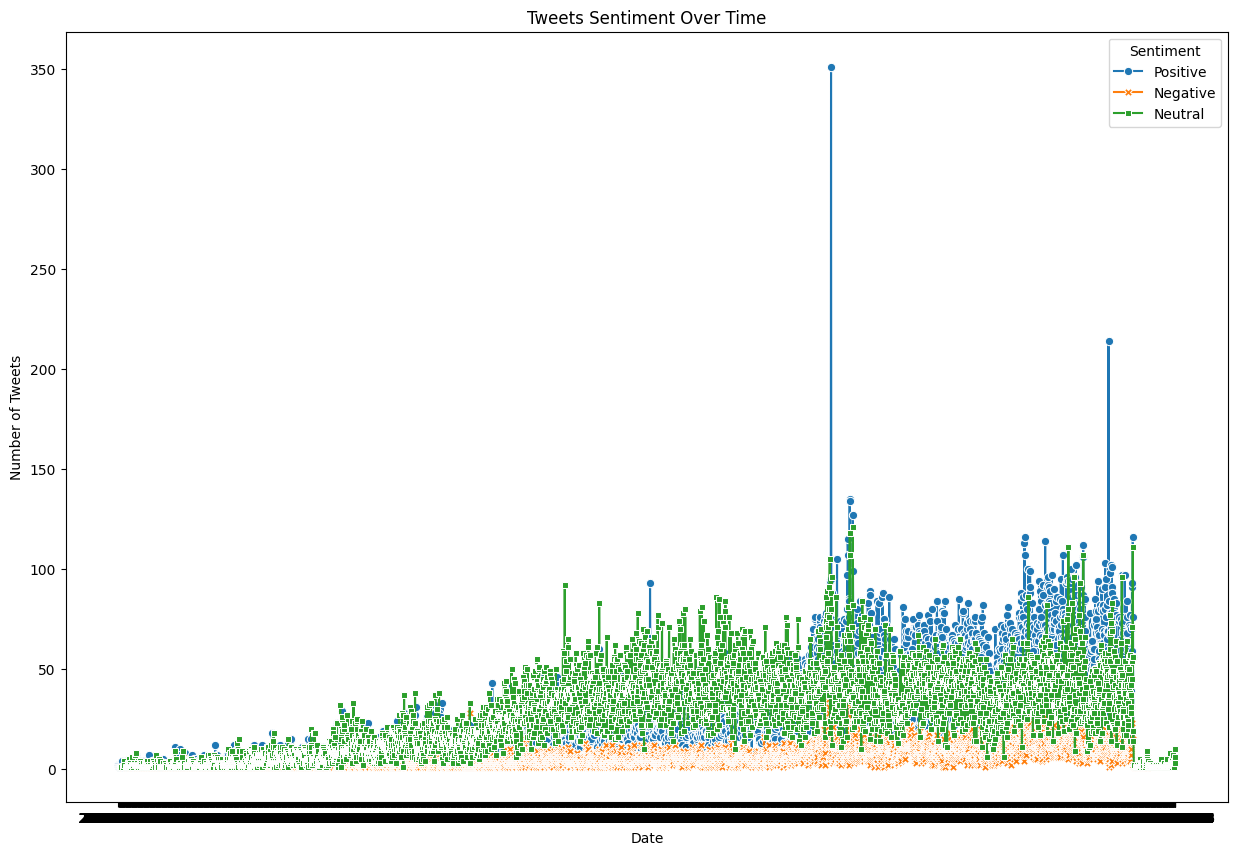

In [21]:
# Concatenate positive and negative DataFrames
concat_df = pd.concat([pos, neg, neutral], keys=['Positive', 'Negative', 'Neutral'], names=['Sentiment']).reset_index(level=0)

# Plot using Seaborn
plt.figure(figsize=(15, 10))
sns.lineplot(data = concat_df, x = 'date', y = 'id', hue = 'Sentiment', style = 'Sentiment', markers = True, dashes = False)
plt.title('Tweets Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

In [23]:
# filter the df to only capture Tweets from the start of May to end of June
newdf = data[(data['date']>='2019-05-01') & (data['date']<='2019-06-29')]

neg = newdf[newdf['sentiment']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = newdf[newdf['sentiment']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

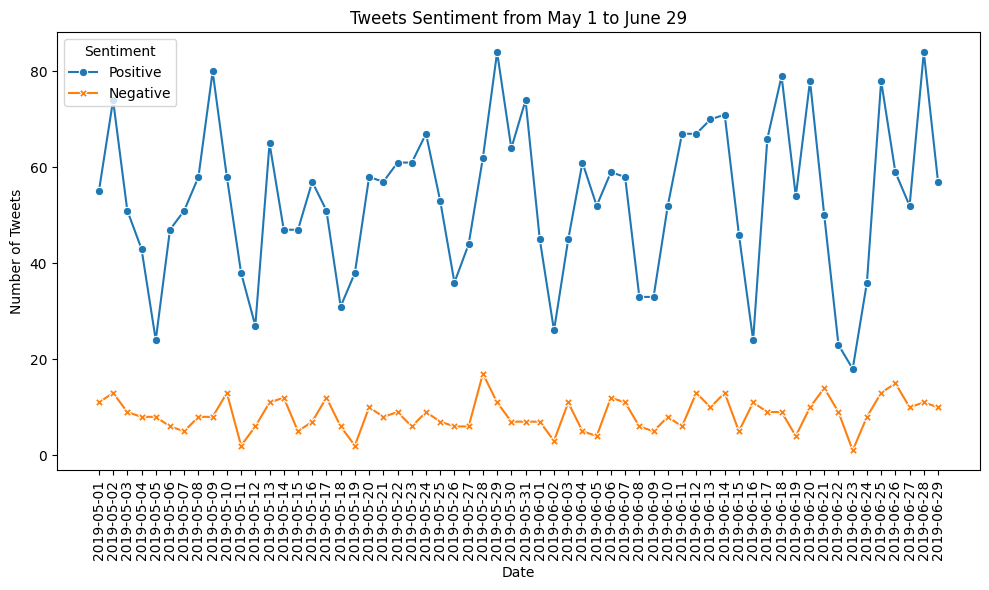

In [24]:
# Concatenate positive and negative DataFrames
concat_df = pd.concat([pos, neg], keys=['Positive', 'Negative'], names=['Sentiment']).reset_index(level=0)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=concat_df, x='date', y='id', hue='Sentiment', style='Sentiment', markers=True, dashes=False)
plt.title('Tweets Sentiment from May 1 to June 29')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

### **Analysis Result**

In [35]:
print("Sentiment Analysis Results:")
print("Positive tweets:", positive_count)
print("Negative tweets:", negative_count)
print("Neutral tweets:", neutral_count)

Sentiment Analysis Results:
Positive tweets: 221522
Negative tweets: 42830
Neutral tweets: 218420


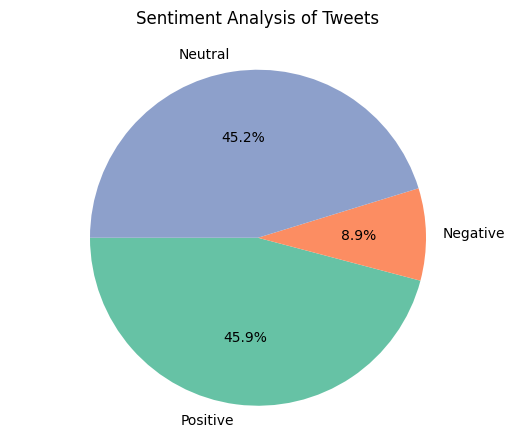

In [17]:
# Sentiment labels
labels = ['Positive', 'Negative', 'Neutral']
# Sentiment counts
counts = [positive_count, negative_count, neutral_count]
# Colors for each sentiment
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create pie chart
plt.pie(counts, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 180)
plt.title('Sentiment Analysis of Tweets\n')
plt.axis('equal')
plt.show()

## **User Inputs**

In [ ]:
text = input("Enter text : ")
preprocess_text(text)

In [ ]:
analysis = TextBlob(text)

polarity = analysis.sentiment.polarity
if polarity > 0:
    print("Positive")
elif polarity < 0:
    print("Negative")
else:
    print("Neutral")